In [11]:
import numpy as np
import pyccl as ccl
import matplotlib.pyplot as plt
from scipy import signal

## Tuesday Week 2 (16/07/2024): Have to create a class for an stellar mass profile
 - Look at https://github.com/LSSTDESC/CCL/blob/master/pyccl/halos/profiles/nfw.py as an example of the creation of a halo mass profile.
 - Python docs on classes: https://docs.python.org/3/tutorial/classes.html
 - Selected bits: 
   - the class inheritance mechanism allows multiple base classes
   - a derived class can override any methods of its base class or classes
   - a method can call the method of a base class with the same name

$\rho_X(r)\ = Ma ^{-3} f_X g_X(r)\$. 

- M = total halo mass
- $f_X$ = the fraction of that mass in gas species X
- $g(x)$ = the profile, which satisfies the normalisation $4\pi \int^{\inf)_0 dr r^2 g_X(r)\ = 1$
- a = the scale factor

$f_c + f_b + f_e + f_* = 1$ AND (assuming adiabaticity) $f_b + f_e + f_* = \bar{f}_b \equiv \frac{\Omega_b}{\Omega_M}$

(see: [pdf](../Background-reading/XrayCrossCorrelations-1.pdf)).  
$g_*(r)\ \equiv \delta^D$(**x**) (a Delta function; Dirac delta function = also called the "unit impulse")   
& the Fourier profile is then:   
$\tilde{g}_*(k)\ = 1$

In [158]:
signal.unit_impulse(100000, 0)
np.shape(np.array([[3,5,6,7],[2,3,4,5]]))
np.shape(trial_r)[1] == len(trial_r)

IndexError: tuple index out of range

In [188]:
class stellar_profile(ccl.halos.profiles.profile_base.HaloProfile): #(ccl.halos.Haloprofile):
    """Creating a class for the stellar density profile
    where: """  # could put in the equations used

    def __init__(self, mass_def):
        super(stellar_profile, self).__init__(mass_def=mass_def)

    def _real(self, r, M, centre_pt='mid', a=1): # set the default pars for scale factor a 
        r_use = np.atleast_1d(r) # need them to be functional arrays
        M_use = np.atleast_1d(M)
        len_r = len(r_use) # np.shape(r_use)[0] # equivalent to len(r), but allows for multi-dim arrays
# Returns: float or array_like: halo profile. Shape of output = `(N_M, N_r)` where `N_r` & `N_m` = the sizes of `r` & `M` respectively.

        prefix = M_use / a**3
    # unit_impulse(shape, idx=None, dtype=<class 'float'>) ; idx = Index at which the value is 1. If None, defaults to the 0th element.
    # If idx='mid', the impulse will be centered at shape // 2 in all dimensions. If an int, the impulse will be at idx in all dimensions.
        prof = prefix[:, None] * signal.unit_impulse(len_r, centre_pt)[None,:]
        
        if np.ndim(r) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)
                                                          
        return prof

    def _fourier(self, k, M, a=1):
        k_use = np.atleast_1d(k)
        M_use = np.atleast_1d(M)

        prefix = M_use / a**3
        prof = k_use[None,:] + prefix[:, None] * 1 # as g(k) = 1

        if np.ndim(k) == 0:
            prof = np.squeeze(prof, axis=-1)
        if np.ndim(M) == 0:
            prof = np.squeeze(prof, axis=0)

        return prof
    

In [190]:
# working with z = 0 (today) ; therefore a = 1
# use a mass definition with Delta = 200
hmd_200c = ccl.halos.MassDef200c
trial_Prof = stellar_profile(hmd_200c)

In [192]:
trial_r = np.geomspace(1E-2,1E8,100000) # geomspace is like linspace, but evenly spaces on a logscale
trial_M = np.array([5E12,2E13, 1E14])
profTrial_real = trial_Prof._real(trial_r, trial_M)
profTrial_real  # _real(self, r, M, centre_pt='mid', a=1)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

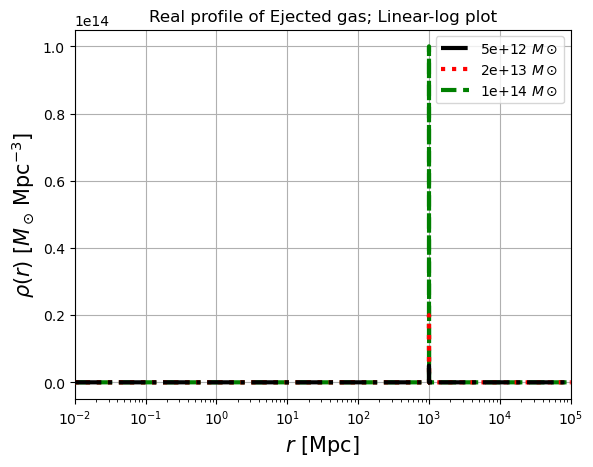

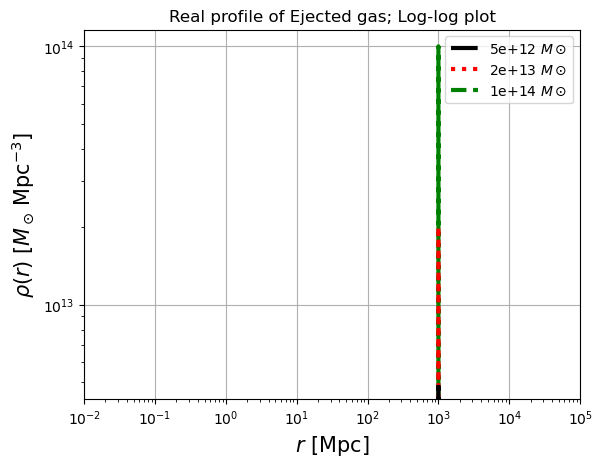

In [194]:
colours = ['k-.', 'r:', 'g--']
i = 0
for j in trial_M:
    plt.plot(trial_r, profTrial_real[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Ejected gas; Linear-log plot')
plt.grid(True)
plt.xscale('log');
plt.legend(loc='best')
plt.xlim(1e-2,1e5);
#plt.ylim(1e-2,1e5);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_r, profTrial_real[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(r)\,\,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$r\,\,[{\rm Mpc}]$', fontsize=15);
plt.title('Real profile of Ejected gas; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
plt.xlim(1e-2,1e5);
#plt.ylim(1e-2,1e5);

In [195]:
trial_k = np.geomspace(1E-20,1E2,100000)
trial_M = np.array([5E12,2E13, 1E14])
profTrial_fourier = trial_Prof._fourier(trial_k, trial_M)
profTrial_fourier

array([[5.e+12, 5.e+12, 5.e+12, ..., 5.e+12, 5.e+12, 5.e+12],
       [2.e+13, 2.e+13, 2.e+13, ..., 2.e+13, 2.e+13, 2.e+13],
       [1.e+14, 1.e+14, 1.e+14, ..., 1.e+14, 1.e+14, 1.e+14]])

#### Normalisation of profiles means that:   
$\rho(k \to 0)\ _x = \frac{M_x}{a^3} [f_x]$   
#### So plotting $y = x + \frac{M_x}{a^3} [f_x]$ should give an overlap with the [normalised] Fourier density profile's plateau

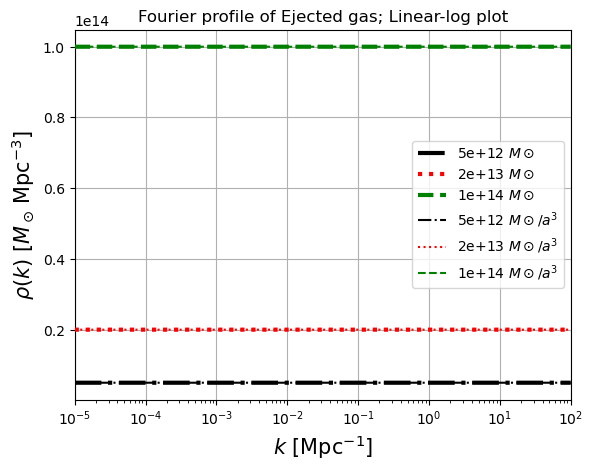

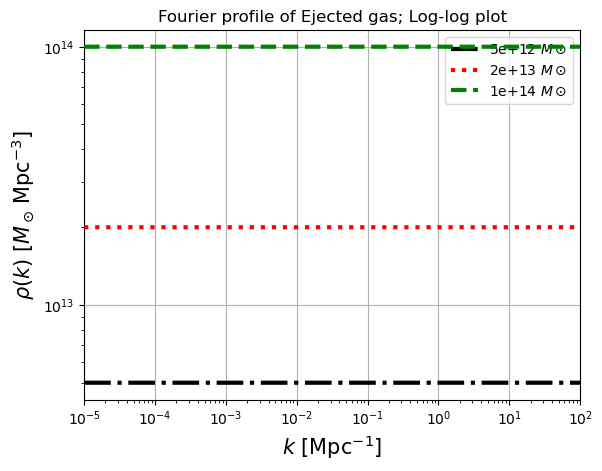

In [197]:
#### colours = ['k-.', 'r:', 'g--']
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
for mass, col in zip(trial_M, colours):
    plt.plot(trial_k, 1*trial_k + mass, col, zorder=(10-i), label=f'{mass:.1g} $M \\odot /a^3$')   # here, a=1 & f=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Ejected gas; Linear-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);

plt.figure()
i = 0
for j in trial_M:
    plt.plot(trial_k, profTrial_fourier[i], colours[i], lw=3, zorder = (10-i), label=f'{trial_M[i]:.1g} $M \\odot $')
    i+=1
plt.ylabel(r'$\rho(k)\, \,[M_\odot\,{\rm Mpc}^{-3}]$', fontsize=15)
plt.xlabel(r'$k\, \,[{\rm Mpc^{-1}}]$', fontsize=15);
plt.title('Fourier profile of Ejected gas; Log-log plot')
plt.grid(True)
plt.legend(loc='best')
plt.xscale('log');
plt.yscale('log');
plt.xlim(1e-5,1e2);
#plt.ylim(1e-5,1e2);